In [1]:
import math

# Dimensiones del hodoscopio (en cm)
w = 4   # Ancho del píxel
l = 120   # Largo del píxel
h = 1   # Grosor del píxel

# Distancias (en m)
d = 2.5   # Distancia entre paneles del hodoscopio
D = 800   # Distancia entre el hodoscopio y el objetivo

# Cálculo de la resolución espacial
spatial_resolution = math.sqrt(w**2/12 + (l**2 + h**2)/(4*d**2)) + w/(2*D)

print("La resolución espacial es de {:.2f} cm".format(spatial_resolution*100))

# Cálculo de la resolución angular
strip_pitch = l + h   # Separación entre las tiras del hodoscopio
theta = math.atan(strip_pitch/d)   # Ángulo de resolución angular

angular_resolution = w/(2*math.tan(theta/2))

print("La resolución angular es de {:.4f} radianes o {:.2f} grados".format(theta, angular_resolution))


La resolución espacial es de 2403.11 cm
La resolución angular es de 1.5501 radianes o 2.04 grados


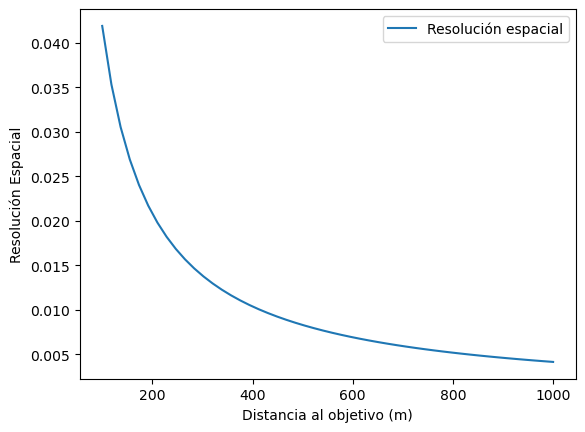

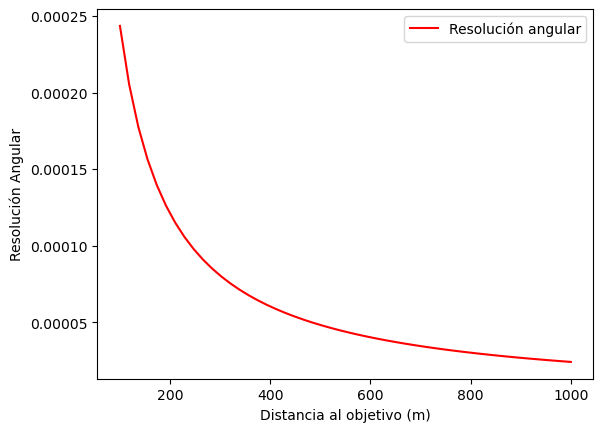

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensiones del detector
n_strips = 30
strip_width = 4 # cm
strip_length = 120 # cm
strip_thickness = 1 # cm

# Distancia entre dos paneles
panel_distance = 2.5 # m

# Rango de distancias al objetivo
distances = np.linspace(100, 1000, 50) # m

# Resoluciones espacial y angular para cada distancia
spatial_resolutions = []
angular_resolutions = []

for distance in distances:
    # Distancia del hodoscopio al objetivo
    hodo_distance = distance - panel_distance / 2
    
    # Resolución espacial
    spatial_resolution = (strip_width / np.sqrt(12) + strip_thickness / 2) / (hodo_distance / panel_distance)
    spatial_resolutions.append(spatial_resolution)
    
    # Resolución angular
    angular_resolution = np.arctan(strip_width / strip_length) / np.sqrt(12) / (hodo_distance / panel_distance)
    angular_resolutions.append(angular_resolution)

# Graficar resultados
plt.plot(distances, spatial_resolutions, label='Resolución espacial')
plt.xlabel('Distancia al objetivo (m)')
plt.ylabel('Resolución Espacial')
plt.legend()
plt.show()

# Graficar resultados
plt.plot(distances, angular_resolutions, label='Resolución angular',color='red')
plt.xlabel('Distancia al objetivo (m)')
plt.ylabel('Resolución Angular')
plt.legend()
plt.show()


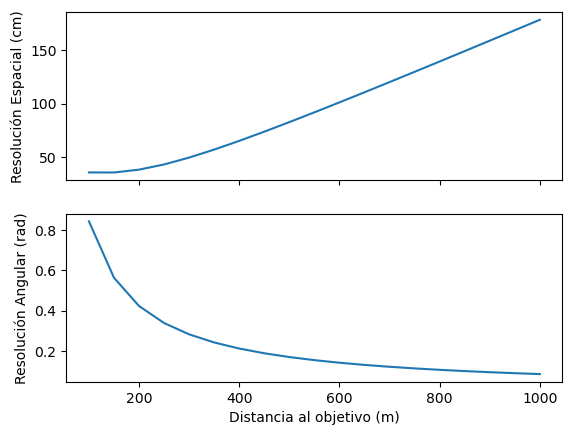

In [11]:
import math
import matplotlib.pyplot as plt

# Dimensiones del detector
W = 120 # Ancho de los strips en cm
L = 4 # Largo del detector en cm
H = 1 # Grosor del detector en cm
D = 2.5 # Distancia entre capas en m

# Distancias a probar
distances = range(100, 1001, 50) # Distancias desde 100 m hasta 1000 m, en pasos de 50 m

# Listas para almacenar las resoluciones espaciales y angulares
res_esp = []
res_ang = []

# Bucle sobre las distancias
for distance in distances:
    # Cálculo de la resolución espacial
    res_esp_top = W/math.sqrt(12) + L/(2*D)
    res_esp_bottom = W/math.sqrt(12) + (distance+H)/(2*D) - (W/2)
    res_esp_total = math.sqrt(res_esp_top**2 + res_esp_bottom**2)
    
    # Cálculo de la resolución angular
    res_ang_top = W/(2*distance)
    res_ang_bottom = W/(2*(distance+H))
    res_ang_total = math.sqrt(res_ang_top**2 + res_ang_bottom**2)
    
    # Agregar los resultados a las listas correspondientes
    res_esp.append(res_esp_total)
    res_ang.append(res_ang_total)

# Graficar los resultados
fig, ax = plt.subplots(2,1, sharex=True)

ax[0].plot(distances, res_esp)
ax[0].set_ylabel("Resolución Espacial (cm)")

ax[1].plot(distances, res_ang)
ax[1].set_ylabel("Resolución Angular (rad)")
ax[1].set_xlabel("Distancia al objetivo (m)")

plt.show()


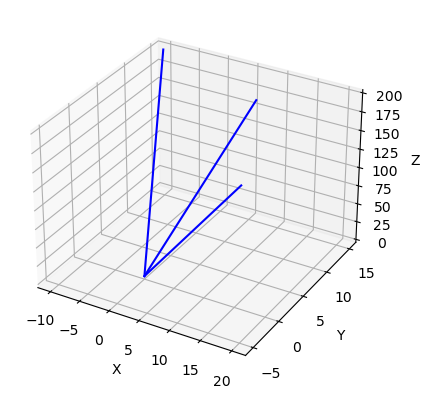

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Puntos de inicio de los muones
start_points = [(0, 0, 0), (0, 0, 0), (0, 0, 0)]
# Puntos de finalización de los muones
end_points = [(10, 10, 200), (20, -5, 200), (-10, 15, 200)]

# Dibujar los muones
for start, end in zip(start_points, end_points):
    ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color='b')
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


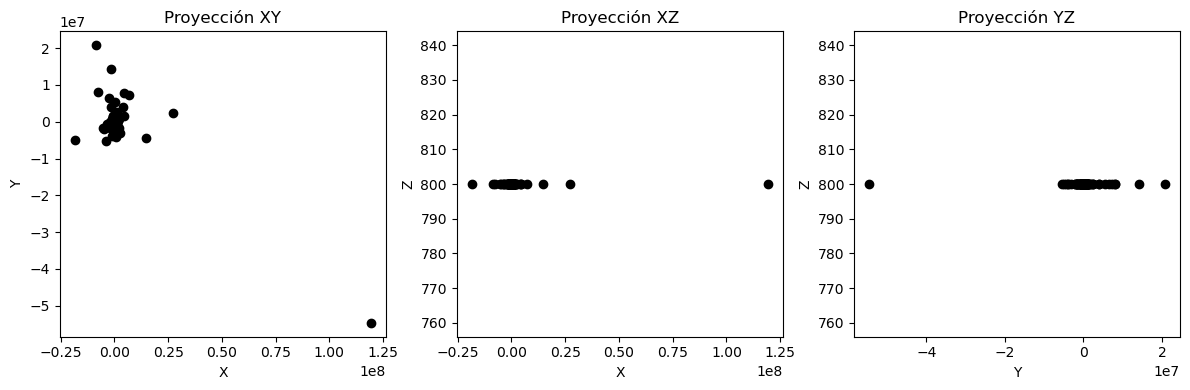

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Geometría del hodoscopio
W = 4.0 # Ancho de las tiras
L = 120.0 # Largo de las tiras
H = 1.0 # Grosor de las tiras
D = 2.5 # Distancia entre capas
d = 800.0 # Distancia al objetivo

# Generación aleatoria de muones
n_muons = 100000
theta = np.random.uniform(low=0.0, high=np.pi, size=n_muons)
phi = np.random.uniform(low=0.0, high=2*np.pi, size=n_muons)

# Posición inicial de los muones
x0 = np.zeros(n_muons)
y0 = np.zeros(n_muons)
z0 = np.zeros(n_muons)

# Dirección de los muones
u = np.sin(theta) * np.cos(phi)
v = np.sin(theta) * np.sin(phi)
w = np.cos(theta)

# Trayectoria de los muones en el hodoscopio
x = []
y = []
z = []
for i in range(n_muons):
    t = (H/2 - z0[i])/w[i] # Tiempo de colisión con la capa superior
    x1 = x0[i] + t*u[i]
    y1 = y0[i] + t*v[i]
    z1 = H/2
    
    t = (D - z1)/w[i] # Tiempo de colisión con la capa inferior
    x2 = x1 + t*u[i]
    y2 = y1 + t*v[i]
    z2 = D
    
    t = (d - z2)/w[i] # Tiempo de llegada al objetivo
    x3 = x2 + t*u[i]
    y3 = y2 + t*v[i]
    z3 = d
    
    x.append(x3)
    y.append(y3)
    z.append(z3)

# Proyecciones XY, XZ y YZ
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax[0].plot(x, y, 'o', color='black')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Proyección XY')
ax[1].plot(x, z, 'o', color='black')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Z')
ax[1].set_title('Proyección XZ')
ax[2].plot(y, z, 'o', color='black')
ax[2].set_xlabel('Y')
ax[2].set_ylabel('Z')
ax[2].set_title('Proyección YZ')
plt.tight_layout()
plt.show()


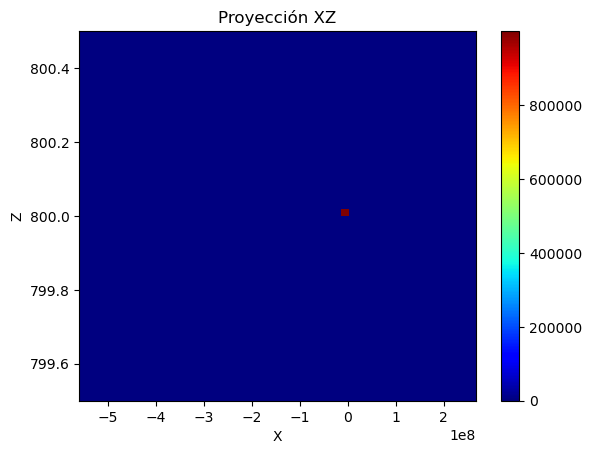

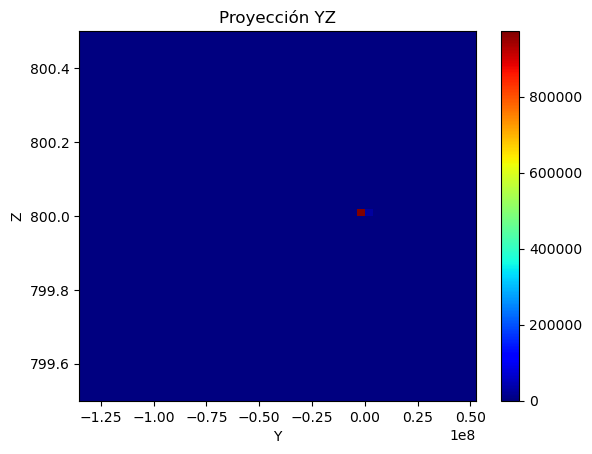

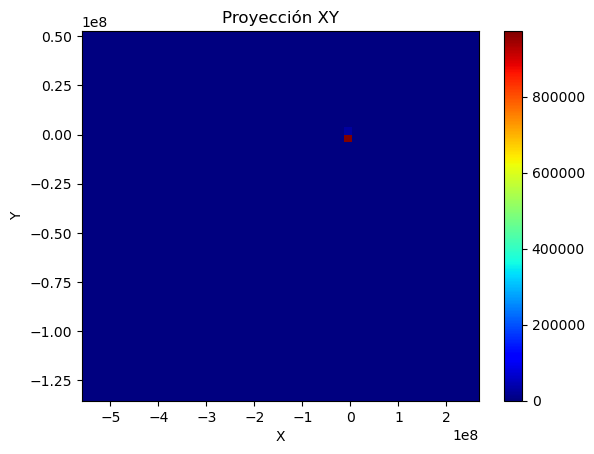

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Geometría del hodoscopio
W = 4.0 # Ancho de las tiras
L = 120.0 # Largo de las tiras
H = 1.0 # Grosor de las tiras
D = 2.5 # Distancia entre capas
d = 800.0 # Distancia al objetivo

# Generación aleatoria de muones
n_muons = 1000000
theta = np.random.uniform(low=0.0, high=np.pi, size=n_muons)
phi = np.random.uniform(low=0.0, high=2*np.pi, size=n_muons)

# Posición inicial de los muones
x0 = np.zeros(n_muons)
y0 = np.zeros(n_muons)
z0 = np.zeros(n_muons)

# Dirección de los muones
u = np.sin(theta) * np.cos(phi)
v = np.sin(theta) * np.sin(phi)
w = np.cos(theta)

# Trayectoria de los muones en el hodoscopio
x = []
y = []
z = []
for i in range(n_muons):
    t = (H/2 - z0[i])/w[i] # Tiempo de colisión con la capa superior
    x1 = x0[i] + t*u[i]
    y1 = y0[i] + t*v[i]
    z1 = H/2
    
    t = (D - z1)/w[i] # Tiempo de colisión con la capa inferior
    x2 = x1 + t*u[i]
    y2 = y1 + t*v[i]
    z2 = D
    
    t = (d - z2)/w[i] # Tiempo de llegada al objetivo
    x3 = x2 + t*u[i]
    y3 = y2 + t*v[i]
    z3 = d
    
    x.append(x3)
    y.append(y3)
    z.append(z3)

# Histograma XZ
plt.hist2d(x, z, bins=50, cmap='jet')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Proyección XZ')
plt.show()

# Histograma YZ
plt.hist2d(y, z, bins=50, cmap='jet')
plt.colorbar()
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Proyección YZ')
plt.show()

# Histograma XY
plt.hist2d(x, y, bins=50, cmap='jet')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Proyección XY')
plt.show()
